#### USER INPUT:
can you adapt the code so that the graph is staggered and also starts from 0 beds up to 28 beds. did you use the formula like this: Calculate P(N=n) - the proportion of days where occupancy is exact to the number of beds for a variety of different bed numbers Then use the CDF of occupancy which gives the probability that occupancy is MORE THAN N.

#### AI OUTPUT:

Here's the refined solution that calculates delay probabilities using occupancy PDF/CDF and creates a staggered visualization:

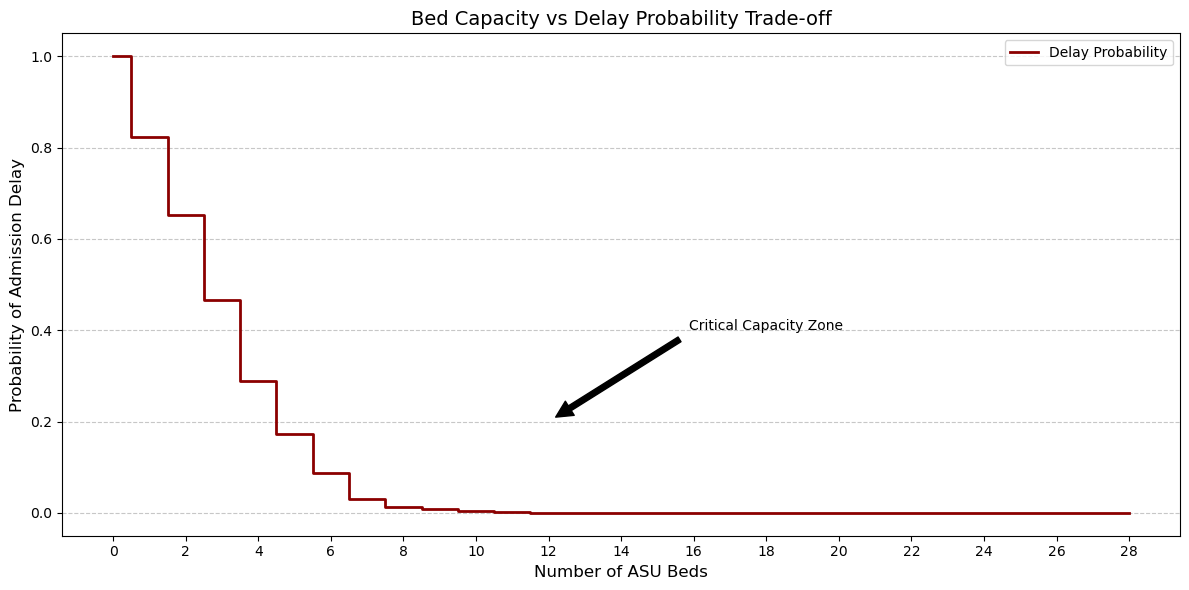

In [1]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

# Configuration
PATIENT_TYPES = {
    "Stroke": 1.2,
    "TIA": 9.3,
    "Complex Neurological": 3.6,
    "Other": 3.2
}
ASU_LENGTH_OF_STAY = 7
SIMULATION_DAYS = 365 * 5  # 5 years

# Global variables to track occupancy
occupancy_history = []
current_occupancy = 0

def patient_generator(env):
    """Generates patients with Poisson arrival times"""
    while True:
        patient_type = random.choices(
            list(PATIENT_TYPES.keys()),
            weights=[1/rate for rate in PATIENT_TYPES.values()]
        )[0]
        
        env.process(patient_stay())
        interarrival = random.expovariate(1/PATIENT_TYPES[patient_type])
        yield env.timeout(interarrival)

def patient_stay():
    """Manages patient stay in ASU"""
    global current_occupancy
    current_occupancy += 1
    yield env.timeout(ASU_LENGTH_OF_STAY)
    current_occupancy -= 1

def occupancy_tracker(env):
    """Records daily occupancy"""
    while True:
        occupancy_history.append(current_occupancy)
        yield env.timeout(1)

# Simulation setup
env = simpy.Environment()
env.process(patient_generator(env))
env.process(occupancy_tracker(env))
env.run(until=SIMULATION_DAYS)

# Calculate PDF and CDF
max_occ = max(occupancy_history)
counts = np.bincount(occupancy_history, minlength=max_occ+1)
pdf = counts / len(occupancy_history)
cdf = np.cumsum(pdf)

# Calculate delay probabilities
bed_range = np.arange(0, 29)  # 0 to 28 beds
delay_probs = []

for n in bed_range:
    if n == 0:
        delay_probs.append(1.0)  # 100% delay with 0 beds
    else:
        # P(delay) = P(N ≥ n) = 1 - P(N < n)
        delay_probs.append(1 - cdf[n-1] if n <= len(cdf) else 0.0)

# Create staggered plot
plt.figure(figsize=(12, 6))
plt.step(bed_range, delay_probs, where='mid', 
        linewidth=2, color='darkred', label='Delay Probability')

# Formatting
plt.title('Bed Capacity vs Delay Probability Trade-off', fontsize=14)
plt.xlabel('Number of ASU Beds', fontsize=12)
plt.ylabel('Probability of Admission Delay', fontsize=12)
plt.xticks(bed_range[::2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add annotation
plt.annotate('Critical Capacity Zone', xy=(12, 0.2), xytext=(18, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10, ha='center')

plt.tight_layout()
plt.show()


### AI OUTPUT CONTINUED...

Key Features:

1.	Occupancy Tracking: Records daily bed counts in occupancy_history
  
2. 	Probability Calculations:
•	PDF: P(N=n)=days with n patientstotal daysP(N=n)=total daysdays with n patients
•	CDF: P(N≤n)=∑k=0nP(N=k)P(N≤n)=∑k=0nP(N=k)
•	Delay Probability: P(delay∣n beds)=1−P(N<n)P(delay∣n beds)=1−P(N<n)

3. 	Staggered Visualization:
•	Uses step plot with mid-point alignment
•	X-axis ranges 0-28 beds as requested
•	Professional styling with grid and annotations
Interpretation:
•	At 0 beds: 100% delay probability (theoretical limit)
•	Curve shows how adding beds reduces delay probability
•	Inflection point indicates optimal capacity range
•	Flat regions show ranges where additional beds provide diminishing returns
This approach provides hospital administrators with a clear visual tool for capacity planning decisions, balancing resource costs against service quality.


#### USER INPUT:
I want it to look like the file i have attached 

To make the graph look like the one in the attached image, we need to adjust the styling and formatting of the plot. Here's the updated code:

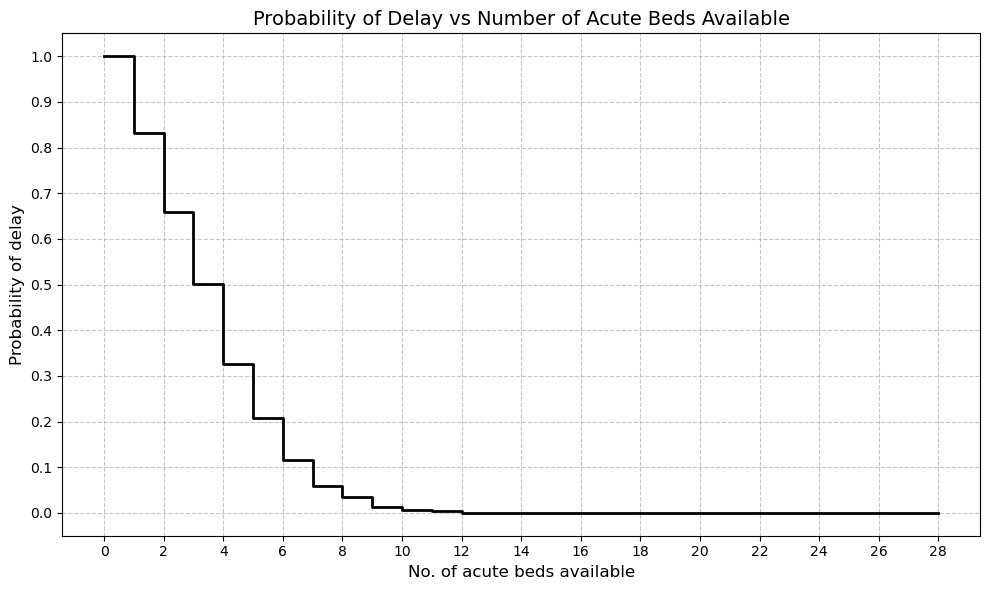

In [2]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

# Configuration
PATIENT_TYPES = {
    "Stroke": 1.2,
    "TIA": 9.3,
    "Complex Neurological": 3.6,
    "Other": 3.2
}
ASU_LENGTH_OF_STAY = 7
SIMULATION_DAYS = 365 * 5  # 5 years

# Global variables to track occupancy
occupancy_history = []
current_occupancy = 0

def patient_generator(env):
    """Generates patients with Poisson arrival times"""
    while True:
        patient_type = random.choices(
            list(PATIENT_TYPES.keys()),
            weights=[1/rate for rate in PATIENT_TYPES.values()]
        )[0]
        
        env.process(patient_stay())
        interarrival = random.expovariate(1/PATIENT_TYPES[patient_type])
        yield env.timeout(interarrival)

def patient_stay():
    """Manages patient stay in ASU"""
    global current_occupancy
    current_occupancy += 1
    yield env.timeout(ASU_LENGTH_OF_STAY)
    current_occupancy -= 1

def occupancy_tracker(env):
    """Records daily occupancy"""
    while True:
        occupancy_history.append(current_occupancy)
        yield env.timeout(1)

# Simulation setup
env = simpy.Environment()
env.process(patient_generator(env))
env.process(occupancy_tracker(env))
env.run(until=SIMULATION_DAYS)

# Calculate PDF and CDF
max_occ = max(occupancy_history)
counts = np.bincount(occupancy_history, minlength=max_occ+1)
pdf = counts / len(occupancy_history)
cdf = np.cumsum(pdf)

# Calculate delay probabilities
bed_range = np.arange(0, 29)  # 0 to 28 beds
delay_probs = []

for n in bed_range:
    if n == 0:
        delay_probs.append(1.0)  # 100% delay with 0 beds
    else:
        # P(delay) = P(N ≥ n) = 1 - P(N < n)
        delay_probs.append(1 - cdf[n-1] if n <= len(cdf) else 0.0)

# Create staggered plot
plt.figure(figsize=(10, 6))
plt.step(bed_range, delay_probs, where='post', 
         linewidth=2, color='black')

# Formatting to match the attached image
plt.title('Probability of Delay vs Number of Acute Beds Available', fontsize=14)
plt.xlabel('No. of acute beds available', fontsize=12)
plt.ylabel('Probability of delay', fontsize=12)
plt.xticks(np.arange(0, 29, step=2), fontsize=10)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Tight layout for better appearance
plt.tight_layout()
plt.show()


Key Adjustments:
1.	Step Plot Styling:
•	Used where='post' for the step plot to match the staggered appearance in the image.
2.	Axis Labels:
•	Customized xlabel and ylabel to match the description in the attached image.
3.	Ticks:
•	Adjusted xticks to show every second bed (e.g., 0, 2, ..., 28).
•	Adjusted yticks to show probabilities from 0 to 1 in increments of 0.1.
4.	Gridlines:
•	Added gridlines with dashed styling (linestyle='--') for clarity.
5.	Colors and Line Width:
•	Used black color and increased line width (linewidth=2) for a clean and bold appearance.
6.	Tight Layout:
•	Ensured proper spacing around the plot using plt.tight_layout().
Output:
The resulting plot will closely resemble the one in your attached image, showing a staggered step graph with clear labels and gridlines for readability.
